In [ ]:
!cd "/content/drive/MyDrive/JWST_data"
!unzip "COSMOS_web_galaxies.zip"

Plot image SCI data


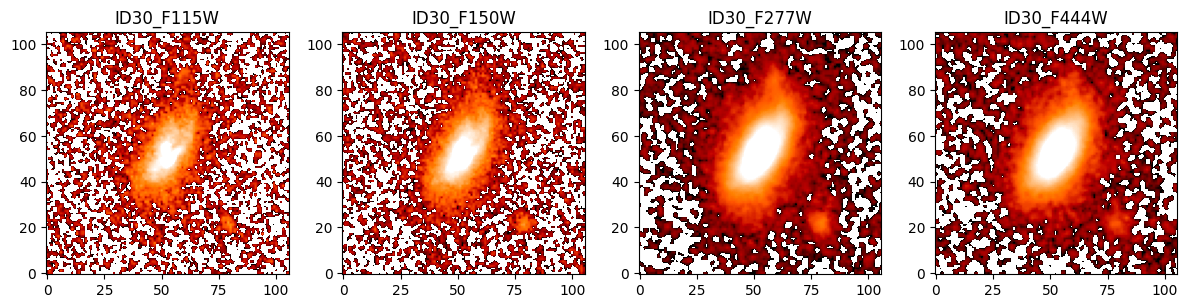

Plot image noise map


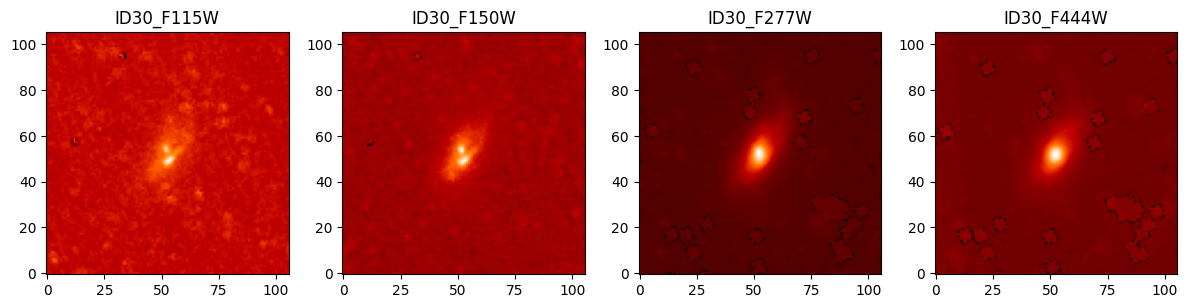

Plot the PSF


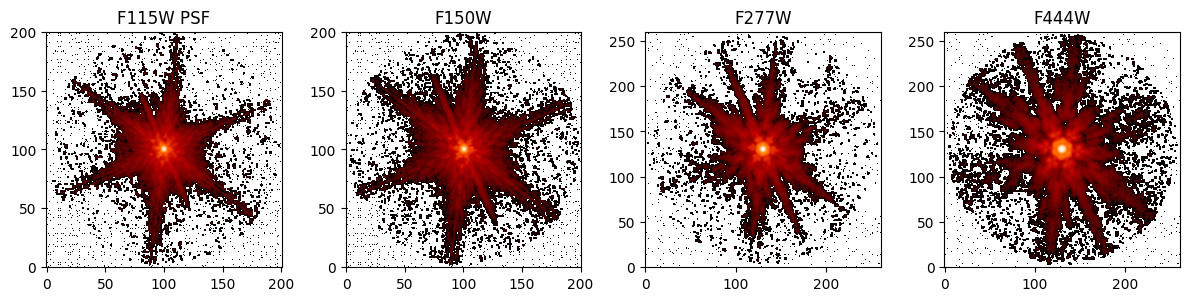

In [ ]:
from astropy.io import fits
import os
import pandas as pd


#cosmos_cata=fits.open('/content/drive/MyDrive/JWST_data/COSMOS_web_galaxies.zip')[1].data
#source_id=cosmos_cata['id']
#source_ra=cosmos_cata['ra']
#source_dec=cosmos_cata['dec']
#source_z=cosmos_cata['z']

# #Write files:
# write_file = open('cd3_catalog.txt','w')

# write_file.write("ID RA Dec\n")
# for i in range(len(source_z)):
#     write_file.write("{0} {1} {2} {3}\n".format(i, source_ra[i], source_dec[i], source_z[i]))
# write_file.close()

#%%

ID=30
#psf data
parent_dir = '/content/drive/MyDrive/JWST_data/'
fits_psf115data=fits.open(parent_dir+"JWST_f115w.psf")[1].data[0][0][0]
fits_psf150data=fits.open(parent_dir+"JWST_f150w.psf")[1].data[0][0][0]
fits_psf277data=fits.open(parent_dir+"JWST_f277w.psf")[1].data[0][0][0]
fits_psf444data=fits.open(parent_dir+"JWST_f444w.psf")[1].data[0][0][0]

fits_psf115data=fits.open(parent_dir+"JWST_f115w.psf")[1].data[0][0][0]
fits_psf150data=fits.open(parent_dir+"JWST_f150w.psf")[1].data[0][0][0]
fits_psf277data=fits.open(parent_dir+"JWST_f277w.psf")[1].data[0][0][0]
fits_psf444data=fits.open(parent_dir+"JWST_f444w.psf")[1].data[0][0][0]
#img data
import glob
fits115=glob.glob(parent_dir+"cd3_cutout/{0}_NIRCAM_F115W_cutout*.fits".format(ID))[0]
fits150=glob.glob(parent_dir+"cd3_cutout/{0}_NIRCAM_F150W_cutout*.fits".format(ID))[0]
fits277=glob.glob(parent_dir+"cd3_cutout/{0}_NIRCAM_F277W_cutout*.fits".format(ID))[0]
fits444=glob.glob(parent_dir+"cd3_cutout/{0}_NIRCAM_F444W_cutout*.fits".format(ID))[0]
fits115data=fits.open(fits115)[1].data
fits150data=fits.open(fits150)[1].data
fits277data=fits.open(fits277)[1].data
fits444data=fits.open(fits444)[1].data

#Load the noise map
fits115noise=fits.open(fits115)[3].data
fits150noise=fits.open(fits150)[3].data
fits277noise=fits.open(fits277)[3].data
fits444noise=fits.open(fits444)[3].data

#Plot images and psf
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#images
print("Plot image SCI data")
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
# Plot each image in a separate subplot

axes[0].imshow(fits.open(fits115)[1].data, cmap='gist_heat',  norm=colors.LogNorm(vmin=0.001, vmax=0.5),origin='lower')
axes[0].set_title('ID'+repr(ID)+'_F115W')

axes[1].imshow(fits150data, cmap='gist_heat',  norm=colors.LogNorm(vmin=0.001, vmax=0.5),origin='lower')
axes[1].set_title('ID'+repr(ID)+'_F150W')

axes[2].imshow(fits277data, cmap='gist_heat',  norm=colors.LogNorm(vmin=0.001, vmax=0.5),origin='lower')
axes[2].set_title('ID'+repr(ID)+'_F277W')

axes[3].imshow(fits444data, cmap='gist_heat', norm=colors.LogNorm(vmin=0.001, vmax=0.5),origin='lower')
axes[3].set_title('ID'+repr(ID)+'_F444W')

plt.tight_layout()
plt.show()


#Plot noise map
print("Plot image noise map")
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
# Plot each image in a separate subplot
axes[0].imshow(fits115noise, cmap='gist_heat',origin='lower')
axes[0].set_title('ID'+repr(ID)+'_F115W')

axes[1].imshow(fits150noise, cmap='gist_heat',origin='lower')
axes[1].set_title('ID'+repr(ID)+'_F150W')

axes[2].imshow(fits277noise, cmap='gist_heat',origin='lower')
axes[2].set_title('ID'+repr(ID)+'_F277W')

axes[3].imshow(fits444noise, cmap='gist_heat',origin='lower')
axes[3].set_title('ID'+repr(ID)+'_F444W')

plt.tight_layout()
plt.show()

#psfs
print("Plot the PSF")
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
# Plot each image in a separate subplot
axes[0].imshow(fits_psf115data, cmap='gist_heat',  norm=colors.LogNorm(),origin='lower')
axes[0].set_title('F115W PSF')

axes[1].imshow(fits_psf150data, cmap='gist_heat',  norm=colors.LogNorm(),origin='lower')
axes[1].set_title('F150W')

axes[2].imshow(fits_psf277data, cmap='gist_heat',  norm=colors.LogNorm(),origin='lower')
axes[2].set_title('F277W')

axes[3].imshow(fits_psf444data, cmap='gist_heat', norm=colors.LogNorm(),origin='lower')
axes[3].set_title('F444W')

plt.tight_layout()
plt.show()

In [2]:
from astropy.io import fits
import os
import pandas as pd

parent_dir = '/content/drive/MyDrive/JWST_data/'

# get catalog data
catalog = open(os.path.join(parent_dir, 'cd3_catalog.txt'), 'r')
lines = catalog.readlines()

count = 0
catalog_list = []
for line in lines:
  if count > 0:
    g = line.strip().split(' ')
    gid, ra, dec, z = g
    catalog_list.append({'gid': gid, 'ra': ra, 'dec': dec, 'z': z})
  count += 1

catalog_df = pd.DataFrame.from_records(catalog_list)
print(catalog_df)


       gid                  ra                 dec       z
0        0  149.90801059610106   2.289898760088547  2.7203
1        1  149.90765096964768   2.290029476519826  1.2548
2        2  149.90763750521387    2.29021635438411  2.8822
3        3  149.90717376757635   2.290296942059915  2.6437
4        4  149.90709413893987   2.290592443716647  0.2689
...    ...                 ...                 ...     ...
2235  2235  149.96912147493714  2.3101002127589685  0.8991
2236  2236   149.9697515000381  2.3101652269061166  0.3775
2237  2237  149.96994181629165  2.3106422044734702  3.2267
2238  2238  149.96977550130077   2.311167452254917  0.7184
2239  2239   149.9375219907447  2.3111480317592323  0.2326

[2240 rows x 4 columns]


In [3]:
from scipy.ndimage import zoom
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import AsinhStretch,LogStretch
from astropy.visualization import MinMaxInterval
from PIL import Image
import cv2
from astropy.visualization import make_lupton_rgb


data_path = os.path.join(parent_dir, 'data')
if not os.path.exists(data_path):
  os.makedirs(data_path)

GALAXY_PATH = os.path.join(parent_dir, 'cd3_cutout',
                           '{}_NIRCAM_{}_cutout_0.fits')
OUTPUT_PATH = os.path.join(data_path, "{}_{}.jpeg")
FILTER = 'F150W'

def upsample (x, cutfrac, outsize=224) :
    assert 0.0<cutfrac<=1.0
    totinsize = x.shape[-1]
    assert totinsize == x.shape[-2]

    insize = round(cutfrac * totinsize)
    rmv = totinsize - insize
    xcut = x[..., rmv//2:-rmv//2][..., rmv//2:-rmv//2, :]

    z = outsize/insize
    z = [1, ] * (len(x.shape)-2) + [z, z, ]

    return zoom(xcut, z)


def format_galaxy(gid, filter_n, overwrite=False):
  galaxy_path = GALAXY_PATH.format(gid, filter_n)
  if not os.path.exists(galaxy_path):
    print('Galaxy with gid {} doesnt exist'.format(gid))
    return -1

  output_path = OUTPUT_PATH.format(gid, filter_n)
  if not overwrite and os.path.exists(output_path):
    return

  galaxy = fits.open(galaxy_path)[1].data

  # upsample
  upsampled_galaxy = upsample(galaxy, 0.99)

  # normalize
  #interval = MinMaxInterval()
  #transform = AsinhStretch() + interval
  #norm = transform(upsampled_galaxy)
  im = make_lupton_rgb(upsampled_galaxy/np.max(upsampled_galaxy),
                       upsampled_galaxy/np.max(upsampled_galaxy),
                       upsampled_galaxy/np.max(upsampled_galaxy),
                       Q=10, stretch=0.5)

  fig, ax = plt.subplots(ncols=2)
  ax[0].imshow(galaxy)
  ax[1].imshow(im)
  #plt.show()
  plt.imsave(output_path, im)
  plt.close()

  return im

problematic_inputs = []
for gid in catalog_df.gid:
  norm_galaxy = format_galaxy(gid, FILTER)
  if norm_galaxy == -1:
    problematic_inputs.append(gid)

print('Problematic galaxies: ', problematic_inputs)

Galaxy with gid 27 doesnt exist
Problematic galaxies:  ['27']


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
# Create the dataset for finetuning
list_dicts = []
for index, row in catalog_df.iterrows():
  if row.gid in problematic_inputs:
    continue
  galaxy_path = OUTPUT_PATH.format(row.gid, FILTER)
  list_dicts.append({'id_str': row.gid, 'z': row.z, 'file_loc': galaxy_path})

train_df = pd.DataFrame.from_records(list_dicts)

# make sure all image locations exist
assert all([os.path.isfile(loc) for loc in train_df['file_loc']])

label_col = 'z'
label_cols = [label_col]
train_df[label_col]
print(train_df)

     id_str       z                                           file_loc
0         0  2.7203  /content/drive/MyDrive/JWST_data/data/0_F150W....
1         1  1.2548  /content/drive/MyDrive/JWST_data/data/1_F150W....
2         2  2.8822  /content/drive/MyDrive/JWST_data/data/2_F150W....
3         3  2.6437  /content/drive/MyDrive/JWST_data/data/3_F150W....
4         4  0.2689  /content/drive/MyDrive/JWST_data/data/4_F150W....
...     ...     ...                                                ...
2234   2235  0.8991  /content/drive/MyDrive/JWST_data/data/2235_F15...
2235   2236  0.3775  /content/drive/MyDrive/JWST_data/data/2236_F15...
2236   2237  3.2267  /content/drive/MyDrive/JWST_data/data/2237_F15...
2237   2238  0.7184  /content/drive/MyDrive/JWST_data/data/2238_F15...
2238   2239  0.2326  /content/drive/MyDrive/JWST_data/data/2239_F15...

[2239 rows x 3 columns]


In [5]:
!git clone https://github.com/mwalmsley/zoobot.git   # places the cloned repo into zoobot_dir
!pip install -e /content/zoobot[pytorch_colab]

Cloning into 'zoobot'...
remote: Enumerating objects: 10096, done.
remote: Counting objects: 100% (4084/4084), done.
remote: Compressing objects: 100% (1161/1161), done.
remote: Total 10096 (delta 3020), reused 3964 (delta 2913), pack-reused 6012
Receiving objects: 100% (10096/10096), 334.38 MiB | 31.56 MiB/s, done.
Resolving deltas: 100% (6611/6611), done.
Obtaining file:///content/zoobot
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.7/777.7 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.4/512.4 kB 21.1 MB/s eta 

In [29]:
from galaxy_datasets.pytorch.galaxy_datamodule import GalaxyDataModule

datamodule = GalaxyDataModule(
  label_cols=label_cols,
  catalog=train_df,
  greyscale=False,
  batch_size=32,
  resize_after_crop=224,  # the size of the images input to the model
  num_workers=2  # sets the parallelism for loading data. 2 works well on colab.
)

In [6]:
# google colab needs this hack to make git-cloned packaged importable
# it's not needed locally
import os
import sys
zoobot_dir = '/content/zoobot'
os.chdir(zoobot_dir)
sys.path.append(zoobot_dir)
!git pull  # just to make sure we're up to date

Already up to date.


In [7]:
# make a directory to place the checkpoint
# this could be anywhere, but Zoobot has this folder already
checkpoint_dir = os.path.join(zoobot_dir, 'data/pretrained_models/pytorch')  # Can place your checkpoint anywhere,

# if not os.path.isdir(checkpoint_dir):
#   os.makedirs(checkpoint_dir)

In [8]:
!wget --no-check-certificate 'https://www.dropbox.com/scl/fi/19mooltlnofnj10crd88v/effnetb0_color_224px.ckpt?rlkey=2wczt74p8qmjvsf83sulrkdy4&dl=0' -O $checkpoint_dir/checkpoint.ckpt

--2024-01-23 03:51:39--  https://www.dropbox.com/scl/fi/19mooltlnofnj10crd88v/effnetb0_color_224px.ckpt?rlkey=2wczt74p8qmjvsf83sulrkdy4&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca203821437857126ef1a74ae58.dl-eu.dropboxusercontent.com/cd/0/inline/CL29erRJJvRipNyQZ09MdtejWc5trq842znWWEaNJ39DRYBKZa4hXpJbxELL6BineqCzUWJsdErq_DDmxBOjeY-2ZbtlgowO1Hgpu4-p7HKIW0HERmibPB11EET5tlyzwGcyb8ap59Rq3DvfhiUHAtfc/file# [following]
--2024-01-23 03:51:40--  https://uca203821437857126ef1a74ae58.dl-eu.dropboxusercontent.com/cd/0/inline/CL29erRJJvRipNyQZ09MdtejWc5trq842znWWEaNJ39DRYBKZa4hXpJbxELL6BineqCzUWJsdErq_DDmxBOjeY-2ZbtlgowO1Hgpu4-p7HKIW0HERmibPB11EET5tlyzwGcyb8ap59Rq3DvfhiUHAtfc/file
Resolving uca203821437857126ef1a74ae58.dl-eu.dropboxusercontent.com (uca203821437857126ef1a74ae58.dl-eu.dropboxuserconten

In [10]:
from zoobot.pytorch.estimators import define_model

checkpoint_loc = os.path.join(zoobot_dir, 'data/pretrained_models/pytorch/checkpoint.ckpt')  # downloaded above
save_dir = os.path.join(zoobot_dir, 'results/pytorch/finetune/finetune_binary_classification')

model = finetune.FinetuneableZoobotClassifier(
  checkpoint_loc=checkpoint_loc,
  num_classes=2,
  n_blocks=2  # only updating the head weights. Set 0 for only output layer. Set e.g. 1, 2 to finetune deeper.
)


trainer = finetune.get_trainer(save_dir, accelerator='auto', devices='auto', max_epochs=30)
trainer.fit(model, datamodule)


NameError: name 'finetune' is not defined

In [11]:
encoder = define_model.ZoobotTree.load_from_checkpoint(checkpoint_loc).encoder


In [12]:
from zoobot.pytorch.training import finetune, representations
from zoobot.pytorch.predictions import predict_on_catalog
import torch


im = cv2.imread(os.path.join(data_path, os.listdir(data_path)[0]))
x = torch.tensor(im).unsqueeze(0).permute(0, 3, 1, 2) / 255

model = representations.ZoobotEncoder(encoder=encoder, pyramid=False)
z = model(x)
z.shape

GZDESI/GZRings/GZCD not available from galaxy_datasets.pytorch.datasets - skipping


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [13]:
!pip install torchinfo

In [14]:
from torchinfo import summary

In [15]:
summary(model, verbose=True)

Layer (type:depth-idx)                             Param #
ZoobotEncoder                                      --
├─EfficientNet: 1-1                                --
│    └─Conv2d: 2-1                                 864
│    └─BatchNormAct2d: 2-2                         64
│    │    └─Identity: 3-1                          --
│    │    └─SiLU: 3-2                              --
│    └─Sequential: 2-3                             --
│    │    └─Sequential: 3-3                        1,448
│    │    └─Sequential: 3-4                        16,714
│    │    └─Sequential: 3-5                        46,640
│    │    └─Sequential: 3-6                        242,930
│    │    └─Sequential: 3-7                        543,148
│    │    └─Sequential: 3-8                        2,026,348
│    │    └─Sequential: 3-9                        717,232
│    └─Conv2d: 2-4                                 409,600
│    └─BatchNormAct2d: 2-5                         2,560
│    │    └─Identity: 3-10         

Layer (type:depth-idx)                             Param #
ZoobotEncoder                                      --
├─EfficientNet: 1-1                                --
│    └─Conv2d: 2-1                                 864
│    └─BatchNormAct2d: 2-2                         64
│    │    └─Identity: 3-1                          --
│    │    └─SiLU: 3-2                              --
│    └─Sequential: 2-3                             --
│    │    └─Sequential: 3-3                        1,448
│    │    └─Sequential: 3-4                        16,714
│    │    └─Sequential: 3-5                        46,640
│    │    └─Sequential: 3-6                        242,930
│    │    └─Sequential: 3-7                        543,148
│    │    └─Sequential: 3-8                        2,026,348
│    │    └─Sequential: 3-9                        717,232
│    └─Conv2d: 2-4                                 409,600
│    └─BatchNormAct2d: 2-5                         2,560
│    │    └─Identity: 3-10         

In [16]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2
import glob
import numpy as np


class JWSTDataset(Dataset):
  def __init__(self, img_path, label_path):
    self.data_paths = [os.path.join(img_path, f) for f in os.listdir(img_path)]
    self.labels = None

  def __len__(self):
    return len(self.data_paths)

  def __getitem__(self, idx):
    im = cv2.imread(self.data_paths[idx])
    label = 1
    im_channels_first = np.transpose(im, axes=[2, 0, 1]) / 255
    return (torch.tensor(im_channels_first, dtype=torch.float),
              torch.tensor(label, dtype=torch.float))

batch_size = 32
ds = JWSTDataset(data_path, '/content/drive/MyDrive/JWST_data/data1')
dataloader = DataLoader(ds, batch_size=batch_size, shuffle=False)

In [17]:
model = model.cuda()

In [21]:
z_list = []
with torch.no_grad():
  for dat in dataloader:
    x, y = map(lambda x: x.cuda(), dat)
    z = model(x)
    z_list.append(z)

  zs = torch.cat(z_list, dim=0)